# Image Captioning using Deep Learning

### CS5661 - Topics in Data Science
#### Group :- Hiralben Hirpara, Ruchita Savaliya
----------------------------------------------------------------------------------------------------------------
In this file, we prepared Image captions data for training and testing set. And create vocabulary from captions,  attched "start","end" keywords to captions, remove all punctuation from captions, find out caption maximum length from captions and store clean caption in pickle file such as tokenizer.pkl, train_caption.pkl, test_caption.

### Import important libraries

In [1]:
from pickle import dump

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import string

from keras.preprocessing.text import Tokenizer

print('All modules imported.')

All modules imported.


#### The location of the caption file, image file and pickle file

In [2]:
## Set file paths
img_dir = 'IMGCG-DataSet/Flickr8k_Dataset/Images/'
caption_dir = 'IMGCG-DataSet/Flickr8k_text/'

## Step 1 :  Prepare Text Data

In [3]:
## Set caption file path 
token = caption_dir +'Flickr8k.token.txt'

## Read caption data from Flickr8k.token.txt file  and store it in img_captions
img_captions = open(token, 'r').read().strip().split('\n')

In [4]:
## display Token file data
img_captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [5]:
print("\nTotal Captions in Token File:",len(img_captions))
print("\n")


Total Captions in Token File: 40460




### Load all captions nd store it in dictionary

In [6]:
%%time
## The load_all_caption() function extract image caption for images and store it in dictionary
## In dictionary : the key : image name,  values : image caption

def load_all_caption(img_caption):
    img_captions = dict()
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    
    for line in img_caption:
        tokens = line.split()
        image_id, image_cap = tokens[0], tokens[1:]
        image_id = img_dir+image_id.split('#')[0]
        image_cap = [word.lower() for word in image_cap]
        image_cap = [w.translate(table) for w in image_cap]
        image_cap = ' '.join(image_cap)
        image_cap = image_cap.strip()
        # append "<start>" and "<end>" word to image caption string at starting and ending caption string
        image_cap = '<start> ' + image_cap + ' <end>'
        if image_id not in img_captions:
            img_captions[image_id] = list()
        img_captions[image_id].append(image_cap)
    return img_captions
 

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 5.96 µs


In [7]:
## Parse image captions to load_all_caption funation and store return value in img_captions
img_captions = load_all_caption(img_captions)

In [8]:
## Shows img_captions data
img_captions

{'IMGCG-DataSet/Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg': ['<start> a child in a pink dress is climbing up a set of stairs in an entry way <end>',
  '<start> a girl going into a wooden building <end>',
  '<start> a little girl climbing into a wooden playhouse <end>',
  '<start> a little girl climbing the stairs to her playhouse <end>',
  '<start> a little girl in a pink dress going into a wooden cabin <end>'],
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1001773457_577c3a7d70.jpg': ['<start> a black dog and a spotted dog are fighting <end>',
  '<start> a black dog and a tricolored dog playing with each other on the road <end>',
  '<start> a black dog and a white dog with brown spots are staring at each other in the street <end>',
  '<start> two dogs of different breeds looking at each other on the road <end>',
  '<start> two dogs on pavement moving toward each other <end>'],
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1002674143_1b742ab4b8.jpg': ['<start> a little girl covered in pain

In [9]:
print("\nTotal Captions :",len(img_captions))
print("\n")


Total Captions : 8092




In [10]:
## Extract image path key from img_captions dictionary and store it in image_paths
image_paths = list(img_captions.keys())

In [11]:
## Display first 10 images paths
image_paths[:10]

['IMGCG-DataSet/Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1001773457_577c3a7d70.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1002674143_1b742ab4b8.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1003163366_44323f5815.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1007129816_e794419615.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1007320043_627395c3d8.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1009434119_febe49276a.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1012212859_01547e3f17.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1015118661_980735411b.jpg',
 'IMGCG-DataSet/Flickr8k_Dataset/Images/1015584366_dfcec3c85a.jpg']

### Load Training & Testing file

In [12]:
## Load training images .txt file
train_img = open(caption_dir+'Flickr_8k.trainImages.txt', 'r').read().strip().split('\n')

## Load validation images .txt file
val_img = open(caption_dir+'Flickr_8k.devImages.txt', 'r').read().strip().split('\n')

## Load testing images .txt file
test_img = open(caption_dir+'Flickr_8k.testImages.txt', 'r').read().strip().split('\n')

In [13]:
## Print length of training, validation and testing images length
print("Training Images size :", len(train_img))
print("Validation Images size :", len(val_img))
print("Test Images size : ", len(test_img))

Training Images size : 6000
Validation Images size : 1000
Test Images size :  1000


In [14]:
## Shows the first 10 training images path
train_img[:10]

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg',
 '218342358_1755a9cce1.jpg',
 '2501968935_02f2cd8079.jpg',
 '2699342860_5288e203ea.jpg',
 '2638369467_8fc251595b.jpg',
 '2926786902_815a99a154.jpg']

### Extract Training & Testing sets Image and caption data

In [15]:
## Define load_img_caption_data() funation 
## This funation extract traning, validation and testing sets image name and image captions from img_captions 
## and store it in dictionary.

def load_img_caption_data(images):
    # define dictionary
    imgCaptions = dict()
    
    for image_path in images:
        # get caption list from img_captions
        caption_list = img_captions[img_dir+image_path]
        # store description
        if image_path not in imgCaptions:
            imgCaptions[image_path] = list()
        imgCaptions[image_path].extend(caption_list)
    # return imaage captions & paths
    return imgCaptions


###  Training set :

In [16]:
## Parse the funation for traning set

train_captions = load_img_caption_data(train_img)

In [17]:
## Training set image paths 
train_img_paths = list(train_captions.keys())

In [18]:
## Shows the train captions data
train_captions

{'2513260012_03d33305cf.jpg': ['<start> a black dog is running after a white dog in the snow <end>',
  '<start> black dog chasing brown dog through snow <end>',
  '<start> two dogs chase each other across the snowy ground <end>',
  '<start> two dogs play together in the snow <end>',
  '<start> two dogs running through a low lying body of water <end>'],
 '2903617548_d3e38d7f88.jpg': ['<start> a little baby plays croquet <end>',
  '<start> a little girl plays croquet next to a truck <end>',
  '<start> the child is playing croquette by the truck <end>',
  '<start> the kid is in front of a car with a put and a ball <end>',
  '<start> the little boy is playing with a croquet hammer and ball beside the car <end>'],
 '3338291921_fe7ae0c8f8.jpg': ['<start> a brown dog in the snow has something hot pink in its mouth <end>',
  '<start> a brown dog in the snow holding a pink hat <end>',
  '<start> a brown dog is holding a pink shirt in the snow <end>',
  '<start> a dog is carrying something pink 

###  Testing set :

In [19]:
## Parse the function for validation set
val_captions  = load_img_caption_data(val_img)

## Parse the function for testing set
test_captions  = load_img_caption_data(test_img)

## Training set image paths 
test_img_paths = list(test_captions.keys())

###  Size of Training set  & Testing set :

In [20]:
## Display image size and caption size for Training, Validation and Testing set

print("\nTraining Images & Captions :", (len(train_captions.keys()),(len(train_captions))*5))
print("Test Images & Captions : ", (len(test_captions.keys()),(len(test_captions)*5)))
print("\n")


Training Images & Captions : (6000, 30000)
Test Images & Captions :  (1000, 5000)




In [21]:
## Display above image Caption 
train_captions['2513260012_03d33305cf.jpg']

['<start> a black dog is running after a white dog in the snow <end>',
 '<start> black dog chasing brown dog through snow <end>',
 '<start> two dogs chase each other across the snowy ground <end>',
 '<start> two dogs play together in the snow <end>',
 '<start> two dogs running through a low lying body of water <end>']

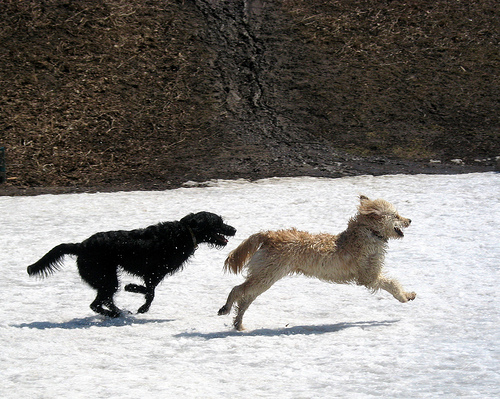

In [22]:
## Display image from Training set
Image.open(img_dir+'2513260012_03d33305cf.jpg')

### Create Vocabulary

In [23]:
# Choose the top 10000 words from the vocabulary
top_k = 10000
tokenizer = Tokenizer(num_words=top_k, lower=True, oov_token="<unk>", filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

## Define toknize_caption() function for convert text into sequence and create vocabulary
def toknize_caption(gen_caption):
    lines = to_lines(gen_caption)
    tokenizer.fit_on_texts(lines)
    # Create the tokenized vectors
    tokenizer.word_index["<start>"] = 1
    tokenizer.word_index["<unk>"] = 3
    

In [24]:
%%time

## Train captions
toknize_caption(train_captions)

## Validation Vector captions
toknize_caption(val_captions)

## Testing Vector captions
toknize_caption(test_captions)

CPU times: user 525 ms, sys: 3.36 ms, total: 528 ms
Wall time: 527 ms


In [25]:
## Display  length
print("Vocabulary Size: ",len(tokenizer.word_index))

Vocabulary Size:  8723


In [28]:
tokenizer.word_index

{'<unk>': 3,
 'a': 2,
 '<start>': 1,
 '<end>': 4,
 'in': 5,
 'the': 6,
 'on': 7,
 'is': 8,
 'and': 9,
 'dog': 10,
 'with': 11,
 'man': 12,
 'of': 13,
 'two': 14,
 'white': 15,
 'black': 16,
 'boy': 17,
 'are': 18,
 'woman': 19,
 'girl': 20,
 'to': 21,
 'wearing': 22,
 'at': 23,
 'people': 24,
 'water': 25,
 'red': 26,
 'young': 27,
 'brown': 28,
 'an': 29,
 'his': 30,
 'blue': 31,
 'dogs': 32,
 'running': 33,
 'through': 34,
 'playing': 35,
 'while': 36,
 'down': 37,
 'shirt': 38,
 'standing': 39,
 'ball': 40,
 'little': 41,
 'grass': 42,
 'child': 43,
 'person': 44,
 'snow': 45,
 'jumping': 46,
 'over': 47,
 'front': 48,
 'three': 49,
 'sitting': 50,
 'holding': 51,
 'field': 52,
 'small': 53,
 'up': 54,
 'by': 55,
 'large': 56,
 'green': 57,
 'one': 58,
 'yellow': 59,
 'group': 60,
 'her': 61,
 'walking': 62,
 'children': 63,
 'men': 64,
 'into': 65,
 'air': 66,
 'beach': 67,
 'near': 68,
 'mouth': 69,
 'jumps': 70,
 'another': 71,
 'for': 72,
 'street': 73,
 'runs': 74,
 'from': 75,

In [27]:
def max_lengthTEMP(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

## Find out Captions Maximum Length
cap_max_length = max_lengthTEMP(train_captions)

In [28]:
## Display Maximum caption length
print("Maximum Caption Length: ",cap_max_length)

Maximum Caption Length:  38


## Store  data in pickle file :

#### pickle tokenizer file

In [29]:
## Store vocabulary into pickle file
fid = open("tokenizer.pkl","wb")
dump(tokenizer, fid)
fid.close()

#### pickle training set captions & images path file

In [267]:
## Store Train caption Vector into pickle file
fid = open("train_captions.pkl","wb")
dump(train_captions, fid)
fid.close()

In [270]:
## Store Test caption vector into pickle file
fid = open("train_img_paths.pkl","wb")
dump(train_img_paths, fid)
fid.close()

#### pickle testing set captions & images path file

In [268]:
## Store Test caption vector into pickle file
fid = open("test_captions.pkl","wb")
dump(test_captions, fid)
fid.close()

In [271]:
## Store Test caption vector into pickle file
fid = open("test_img_paths.pkl","wb")
dump(test_img_paths, fid)
fid.close()

#### pickle whole dataset images caption file

In [269]:
#img_captions
fid = open("img_captions.pkl","wb")
dump(img_captions, fid)
fid.close()